In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [53]:
ncol = tuple(i for i in range(1,64))
x = np.genfromtxt("four_lines.txt", delimiter="    ", usecols=np.arange(1,64))

In [54]:
x_norm =-1 *(x - 0.78)

In [55]:
x_norm[0]

array([ 0.002,  0.002,  0.001,  0.004,  0.002,  0.003,  0.002,  0.003,
        0.002,  0.004,  0.002,  0.001,  0.003,  0.003,  0.002,  0.003,
        0.003,  0.002,  0.003,  0.017,  0.03 ,  0.027,  0.022,  0.016,
        0.014,  0.013,  0.013,  0.01 ,  0.01 ,  0.009,  0.008,  0.009,
        0.006,  0.006,  0.006,  0.006,  0.007,  0.006,  0.006,  0.005,
        0.005,  0.004,  0.005,  0.005,  0.004,  0.004,  0.005,  0.004,
        0.004,  0.004,  0.005,  0.003,  0.003,  0.003,  0.002,  0.001,
        0.002,  0.001,  0.001, -0.   , -0.   , -0.   , -0.001])

In [106]:
def select_maximum(x):
    amp_max = 0
    charge = 0
    for amp in x:
        charge += amp
        if amp_max < amp:
            amp_max = amp
    return (amp_max,charge)
    

In [16]:
def select_time(x,amp_max):
    time_i = 0
    for amp in x:
        if amp >= 0.25 * amp_max:
            return time_i
        time_i +=1
    return time_i

In [11]:
amp_max,charge = select_maximum(x_norm)

In [17]:
freq = 3.2e9
t = 1/freq

In [121]:
time_ = np.arange(0,63) * t


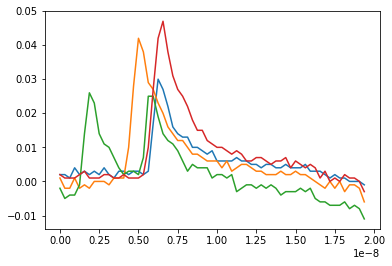

In [58]:
for x_ in x_norm:
    #plt.fill_between(time,x_, alpha=0.4)
    plt.plot(time,x_)

In [99]:

y = np.genfromtxt("test_small.txt", delimiter="    ",autostrip=True, comments="=")

ValueError: Some errors were detected !
    Line #3 (got 64 columns instead of 1)
    Line #6 (got 64 columns instead of 1)
    Line #9 (got 64 columns instead of 1)
    Line #12 (got 64 columns instead of 1)

In [95]:
%%time
import itertools
import numpy as np
import matplotlib.pyplot as plt
import time
import random
n_entry =0
line = 0
with open('test.txt') as f_in:
    f1 = itertools.islice(f_in, 0, None, 3)
    y = np.genfromtxt(f1, delimiter="    ",autostrip=True, comments="=", usecols=np.arange(1,64))
    #hits = np.genfromtxt(f3, delimiter=" ",autostrip=True, comments="=",usecols=(1))

CPU times: user 24.4 s, sys: 851 ms, total: 25.2 s
Wall time: 25.2 s


In [99]:
%%time
import itertools
import numpy as np
import matplotlib.pyplot as plt
import time
import random
n_entry =0
line = 0
with open('test.txt') as f_in1, open('test.txt') as f_in2 :
    f1 = itertools.islice(f_in1, 0, None, 3)
    f2 = itertools.islice(f_in2, 2, None, 3)
    y = np.genfromtxt(f1, delimiter="    ",autostrip=True, comments="=", usecols=np.arange(1,64))
    hits = np.genfromtxt(f2, delimiter=" ",autostrip=True, comments="=",usecols=(1))

CPU times: user 26.5 s, sys: 952 ms, total: 27.5 s
Wall time: 27.5 s


In [114]:
ampl = np.zeros(hits.size)
charge = np.zeros(hits.size)

In [113]:
y[0]

array([0.779, 0.782, 0.782, 0.779, 0.782, 0.781, 0.782, 0.78 , 0.78 ,
       0.78 , 0.781, 0.779, 0.779, 0.779, 0.77 , 0.752, 0.738, 0.742,
       0.751, 0.753, 0.757, 0.76 , 0.764, 0.766, 0.768, 0.768, 0.77 ,
       0.772, 0.772, 0.773, 0.774, 0.774, 0.774, 0.776, 0.774, 0.777,
       0.776, 0.775, 0.775, 0.776, 0.777, 0.777, 0.778, 0.778, 0.778,
       0.777, 0.778, 0.778, 0.777, 0.778, 0.778, 0.779, 0.78 , 0.781,
       0.782, 0.78 , 0.782, 0.78 , 0.783, 0.781, 0.781, 0.782, 0.786])

In [115]:
i = 0
ampl = np.zeros(hits.size)
charge = np.zeros(hits.size)
for y_l in y:
    y_l =-1 *(y_l - 0.78)
    ampl[i], charge[i] = select_maximum(y_l)
    i+=1
    

In [117]:
import pandas as pd
df = pd.DataFrame({'Channel':hits, 'Amplitude':ampl, 'Charge':charge})

In [126]:
df

Channel  Amplitude  Charge
0           6.0      0.042   0.357
1          16.0      0.030   0.357
2          36.0      0.026   0.146
3          52.0      0.047   0.510
4           1.0      0.026   0.143
...         ...        ...     ...
499995     61.0      0.049   0.347
499996      5.0      0.022   0.083
499997     31.0      0.023   0.033
499998     33.0      0.046   0.281
499999     62.0      0.026   0.186

[500000 rows x 3 columns]

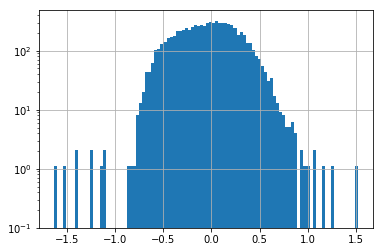

In [127]:
fig, ax = plt.subplots()
df["Charge"][df["Channel"] == 6].hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')

In [229]:
def f_draw(ax,x,y,n_pulse):
    ax.clear()
    col = np.random.rand(3,)
    ax.fill_between(x,y, alpha=0.2, facecolor=col)
    #ax.text(1.75e-8, 0.5, "test", fontsize=12)
    ax.plot(x,y,c=col, label=n_pulse)
    ax.legend()
    fig.canvas.draw()

In [142]:
def random_color():
    rgbl=[255,0,0]
    random.shuffle(rgbl)
    return tuple(rgbl)

In [1]:
%matplotlib notebook

i = 0
fig,ax = plt.subplots(1,1)
for y_ in y:
    #plt.fill_between(time,x_, alpha=0.4)
    y_ =-1 *(y_ - 0.78)
    if max_number(y_)[0] != 1:
        continue
    f_draw(ax,time_,y_,i)
    
    #plt.clf()
    time.sleep(0.5)
    i+=1
    if i ==1000:
        break
    
    #print(y_[1:])

NameError: name 'plt' is not defined

In [148]:
random_color()

(0, 0, 255)

<IPython.core.display.Javascript object>


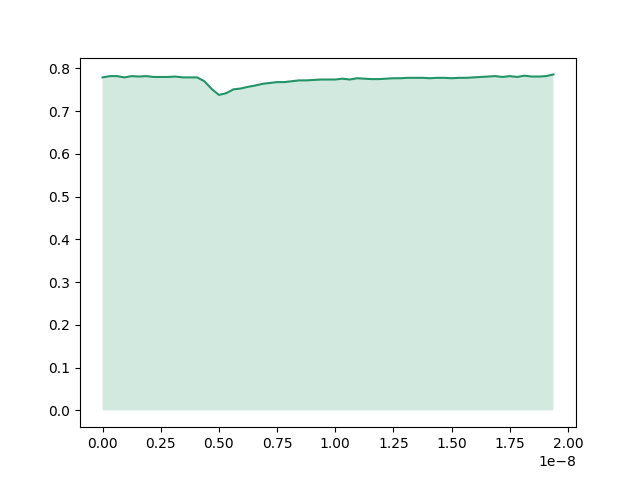

In [174]:
%matplotlib notebook
col = np.random.rand(3,)
plt.plot(time_,y[0],c=col)
plt.fill_between(time_,y[0], alpha=0.2, facecolor=col)

In [90]:
y[0][1:] =  -1 *(y[0][1:] - 0.78)

In [86]:
y_l =  -1 *(y_l - 0.78)

In [179]:
y[0][62]

0.786

In [182]:
1<2<5>4>3

True

In [125]:
def max_number(x):
    i = 0
    n_max = 0
    max_val = []
    for i in range(2,61):
        if (x[i-2] <= x[i-1] <x[i] > x[i+1] >= x[i+2]):
            n_max += 1
            max_val.append(x[i])
    return n_max,max_val   

<IPython.core.display.Javascript object>


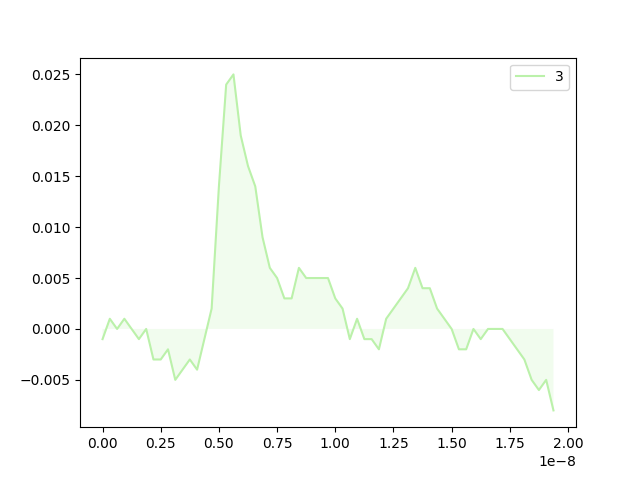

In [228]:
i = 0
fig,ax = plt.subplots(1,1)
te =-1 *(y[14] - 0.78)
f_draw(ax,time_,te)   

#ax.text(1e-8, 0.2,"test",fontsize=12)
#ax.x_label("nana")

In [211]:
max_number(te)

(3, [0.025000000000000022, 0.006000000000000005, 0.006000000000000005])